In [89]:
import scipy.io
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
#imports for LSTM
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_tweedie_deviance
from sklearn.metrics import mean_poisson_deviance
from sklearn.metrics import mean_gamma_deviance
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
import tensorflow as tf
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import RepeatVector, TimeDistributed

In [27]:
sub1_train = scipy.io.loadmat('sub1_comp.mat')
sub1_test = scipy.io.loadmat('sub1_testlabels.mat')
sub2_train = scipy.io.loadmat('sub2_comp.mat')
sub2_test = scipy.io.loadmat('sub2_testlabels.mat')
sub3_train = scipy.io.loadmat('sub3_comp.mat')
sub3_test = scipy.io.loadmat('sub3_testlabels.mat')

In [28]:
sub1_x_train=pd.DataFrame(sub1_train['train_data'])
sub1_y_train=pd.DataFrame(sub1_train['train_dg'])
sub1_x_test=pd.DataFrame(sub1_train['test_data'])
sub1_y_test=pd.DataFrame(sub1_test['test_dg'])

sub2_x_train=pd.DataFrame(sub2_train['train_data'])
sub2_y_train=pd.DataFrame(sub2_train['train_dg'])
sub2_x_test=pd.DataFrame(sub2_train['test_data'])
sub1_y_test=pd.DataFrame(sub1_test['test_dg'])

sub3_x_train=pd.DataFrame(sub3_train['train_data'])
sub3_y_train=pd.DataFrame(sub3_train['train_dg'])
sub3_x_test=pd.DataFrame(sub3_train['test_data'])
sub3_y_test=pd.DataFrame(sub3_test['test_dg'])

In [29]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [42]:
TIME_STEPS = 10

X_train, y_train = create_dataset(sub1_x_train[[0]], sub1_x_train[0], TIME_STEPS)
X_test, y_test = create_dataset(sub1_x_test[[0]], sub1_x_test[0], TIME_STEPS)

In [45]:
y_train.shape

(399990,)

LSTM AutoEncoder


In [90]:
model=Sequential()
model.add(LSTM(
    units = 64,
    input_shape = (X_train.shape[1], X_train.shape[2]),
))
model.add(Dropout(rate=0.2))
model.add(RepeatVector(n=X_train.shape[1]))
model.add(LSTM(units=64, return_sequences=True))

model.add(TimeDistributed(Dense(
    units=X_train.shape[2])))

model.compile(loss='mae', optimizer='adam',metrics=['accuracy'])


In [91]:
history = model.fit(
    X_train,y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.1,
    shuffle=False
)

Epoch 1/10
2813/2813 [==============================] - 89s 30ms/step - loss: 1686.8184 - accuracy: 3.0482e-04 - val_loss: 1670.5592 - val_accuracy: 2.3985e-04
Epoch 2/10
2813/2813 [==============================] - 82s 29ms/step - loss: 1665.3319 - accuracy: 3.0432e-04 - val_loss: 1650.5737 - val_accuracy: 2.3766e-04
Epoch 3/10
2813/2813 [==============================] - 81s 29ms/step - loss: 1649.5358 - accuracy: 3.0770e-04 - val_loss: 1636.6388 - val_accuracy: 2.3629e-04
Epoch 4/10
2813/2813 [==============================] - 81s 29ms/step - loss: 1637.4977 - accuracy: 3.0528e-04 - val_loss: 1623.3010 - val_accuracy: 2.3594e-04
Epoch 5/10
2813/2813 [==============================] - 88s 31ms/step - loss: 1628.2130 - accuracy: 3.1137e-04 - val_loss: 1612.2556 - val_accuracy: 2.3624e-04
Epoch 6/10
2813/2813 [==============================] - 89s 31ms/step - loss: 1616.7524 - accuracy: 3.1069e-04 - val_loss: 1601.1584 - val_accuracy: 2.3698e-04
Epoch 7/10
2813/2813 [==================

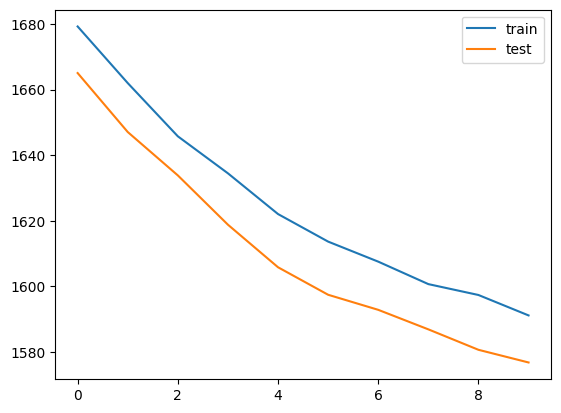

In [49]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

In [53]:
X_train_pred = model.predict(X_train)


12500/12500 [==============================] - 41s 3ms/step


In [88]:
X_train_pred_df=pd.DataFrame(X_train_pred[0])
X_train_pred_df

,0
0,487.656647
1,687.470764
2,731.756897
3,741.945618
4,744.550964
5,745.361877
6,745.682190
7,745.835449
8,745.918030
9,745.965210


In [107]:
train_mae_loss = np.mean(np.abs(X_train_pred - X_train), axis=1)
train_mae_loss_df=pd.DataFrame(train_mae_loss)
train_mae_loss_df
#sum till 50
train_mae_loss_df[0:50].sum()

0    33753.4355
dtype: float64

In [57]:
train_mae_loss.shape

(399990, 1)

C:\Users\Aaditya\AppData\Local\Temp\ipykernel_24904\1731640021.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_mae_loss, bins=50, kde=True);


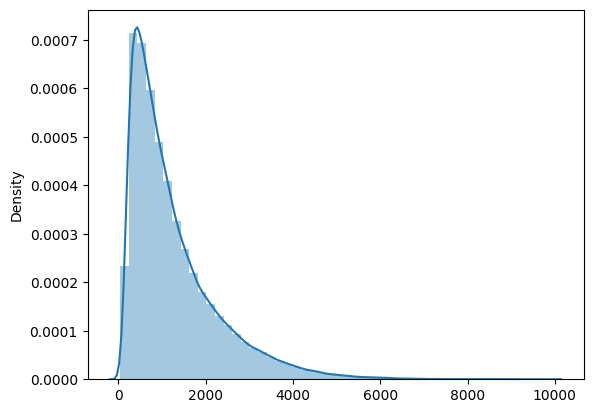

In [56]:
sns.distplot(train_mae_loss, bins=50, kde=True);

In [99]:
X_test_pred = model.predict(X_test)
test_mae_loss = np.mean(np.abs(X_test_pred - X_test), axis=1)

6250/6250 [==============================] - 33s 5ms/step


(199990, 10, 1)

In [79]:
THRESHOLD = 7000

test_score_df = pd.DataFrame(index=sub1_x_test[TIME_STEPS:].index)
test_score_df['loss'] = test_mae_loss
test_score_df['threshold'] = THRESHOLD
test_score_df['anomaly'] = test_score_df.loss > test_score_df.threshold
test_score_df['value'] = sub1_x_test[TIME_STEPS:][0]

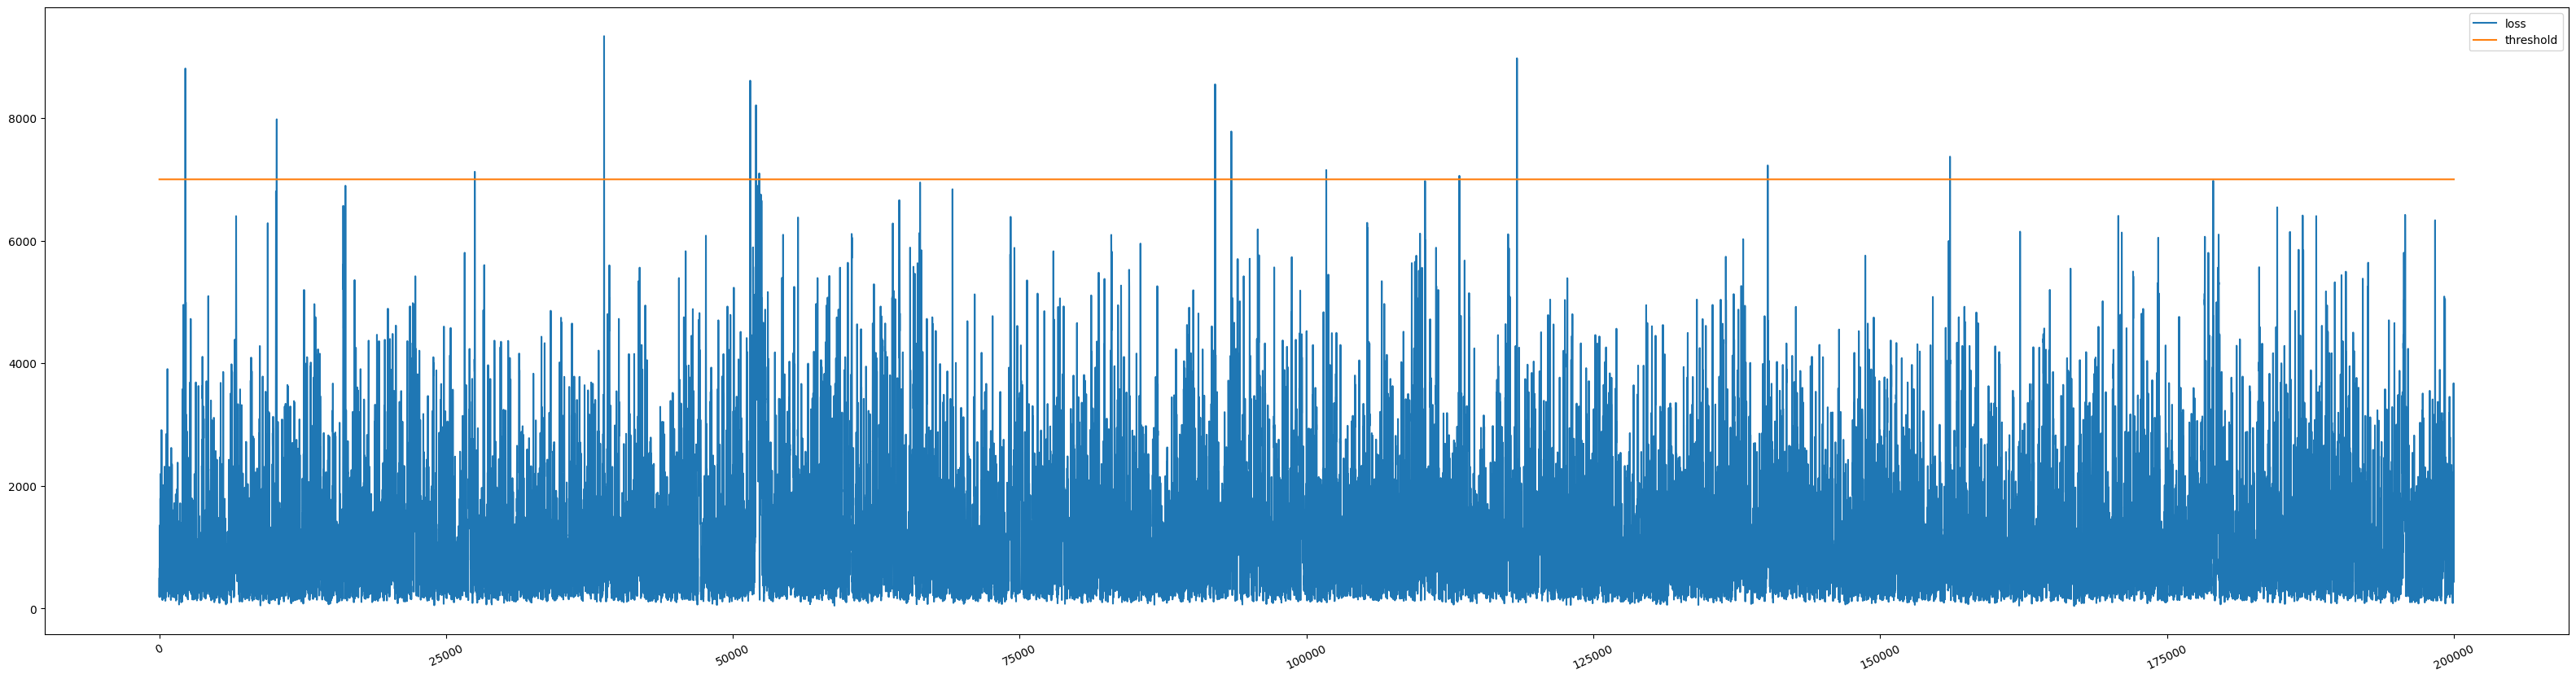

In [80]:
plt.plot(test_score_df.index ,test_score_df.loss, label='loss')
plt.plot(test_score_df.index ,test_score_df.threshold, label='threshold')
plt.xticks(rotation=25)
plt.legend();


In [81]:
anomalies = test_score_df[test_score_df.anomaly == True]
anomalies

,loss,threshold,anomaly,value
2271,7652.025879,7000,True,-10399
2272,8186.225586,7000,True,-9536
2273,8541.225586,7000,True,-8726
2274,8750.525391,7000,True,-7885
2275,8809.026367,7000,True,-6741
...,...,...,...,...
156084,7280.925781,7000,True,-7514
156085,7370.825684,7000,True,-7191
156086,7361.925781,7000,True,-6693
156087,7249.725586,7000,True,-6010


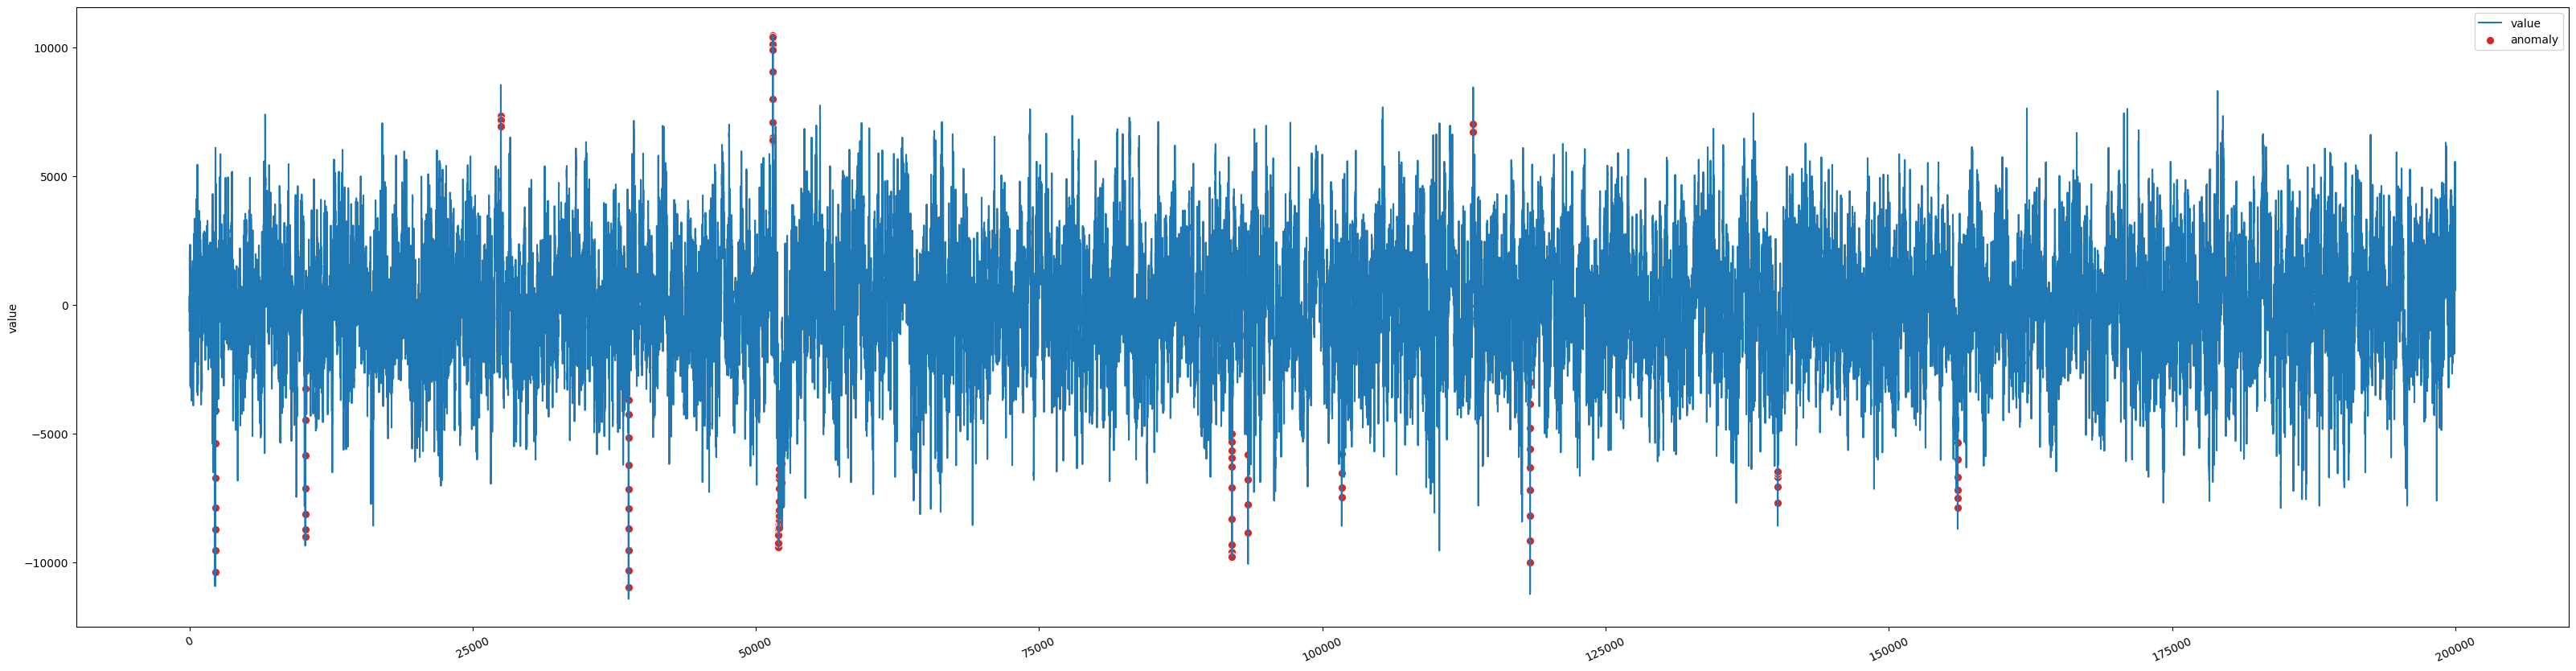

In [82]:
plt.plot(
    sub1_x_test[TIME_STEPS:].index,
    sub1_x_test[TIME_STEPS:][0],
    label='value'
);

sns.scatterplot(
    x=anomalies.index,
    y=anomalies.value,
    color=sns.color_palette()[3],
    s=52,
    label='anomaly'
)
plt.xticks(rotation=25)
plt.legend();
#set figure width
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 40
fig_size[1] = 10

In [83]:
#cap the anamolies to 7000
test_score_df.loc[test_score_df['loss'] > 7000, 'loss'] = 7000


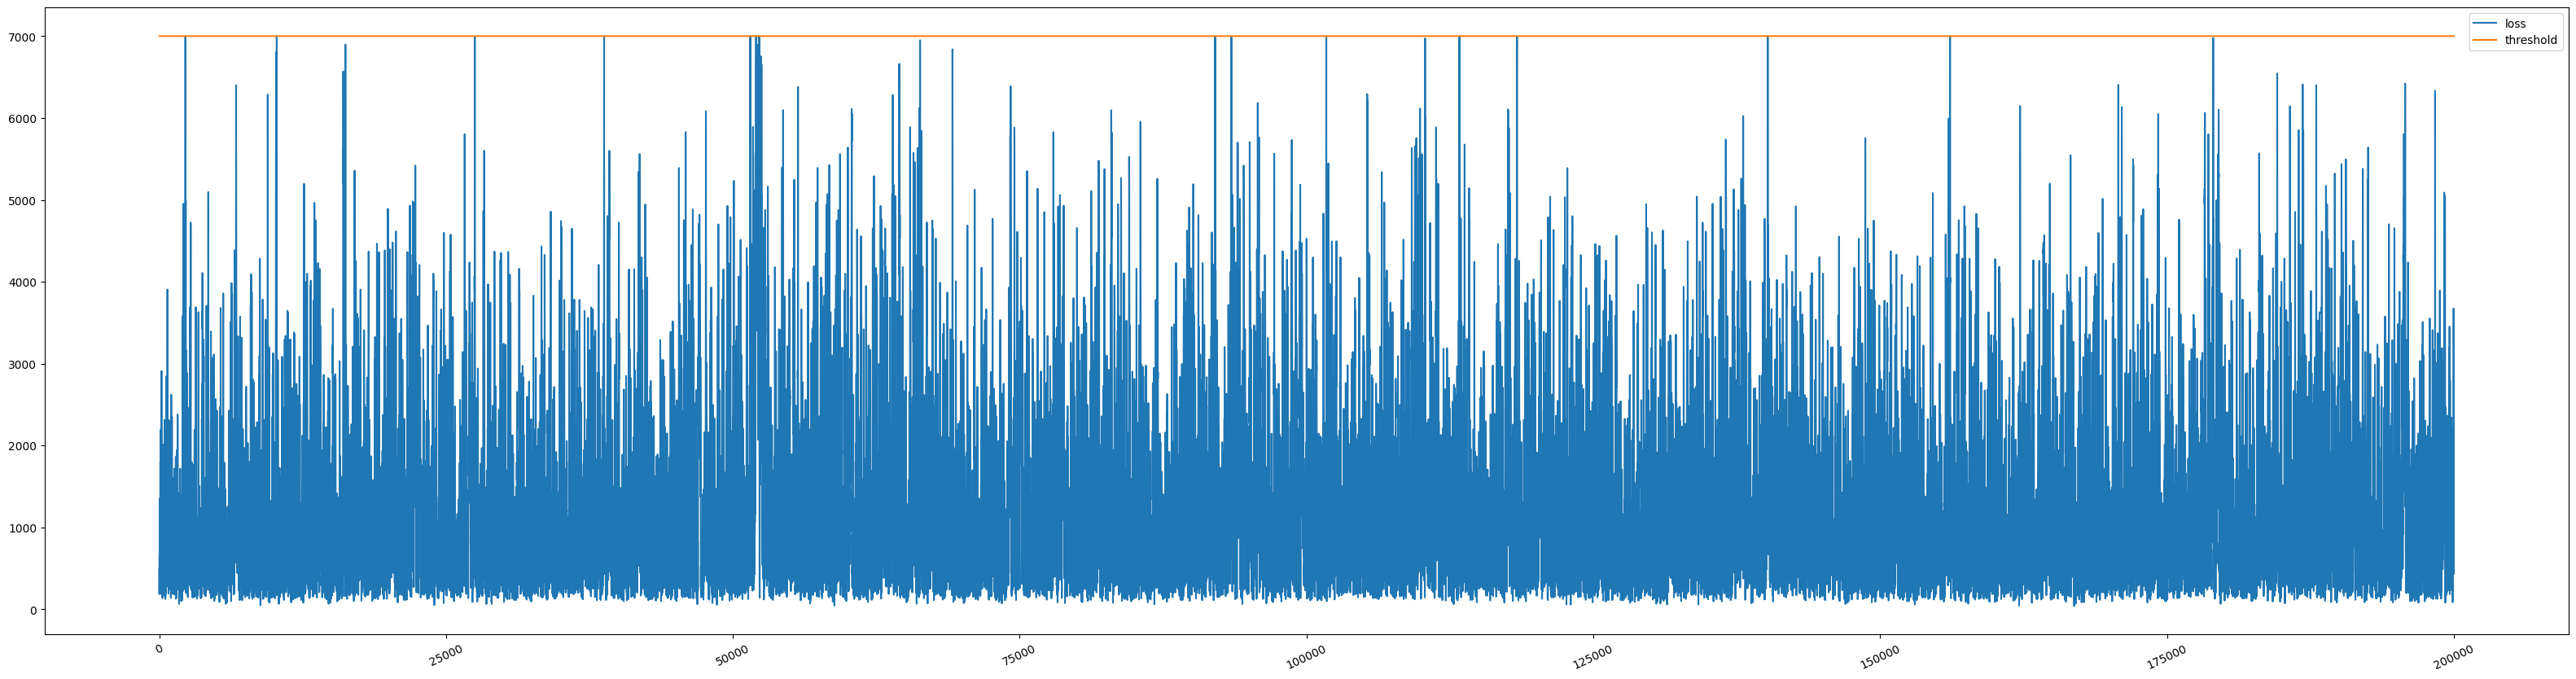

In [84]:
plt.plot(test_score_df.index ,test_score_df.loss, label='loss')
plt.plot(test_score_df.index ,test_score_df.threshold, label='threshold')
plt.xticks(rotation=25)
plt.legend();